# Behavioural Analysis

## Get data

In [1]:
import pandas as pd
import numpy as np

In [14]:
sub_df = pd.read_csv('../../data/info_bis.csv')

In [16]:
c_df = pd.read_csv('../../data/computer_trials.csv')
f_df = pd.read_csv('../../data/fmri_trials.csv')

In [18]:
col_select = ['subjid', 'treatment', 'choice', 'decisionRT']  
c_tr_df = c_df[col_select]
f_tr_df = f_df[col_select]

In [20]:
c_tr_df_avg = c_tr_df.groupby(['subjid', 'treatment'], as_index=False).mean()
c_tr_df_pivot = c_tr_df_avg.pivot(index='subjid', columns='treatment', values=['choice', 'decisionRT'])
c_tr_df_pivot.columns = ['pLL_L', 'pLL_S', 'RT_L', 'RT_S']
c_tr_df_f = c_tr_df_pivot.reset_index()
c_tr_df_f

,subjid,pLL_L,pLL_S,RT_L,RT_S
0,247,0.173469,0.340000,1.211181,1.365819
1,274,0.180000,0.616162,1.326427,1.581963
2,280,0.111111,0.340000,1.166311,1.069909
3,287,0.170000,0.550000,1.389789,1.269100
4,311,0.140000,0.626263,1.530123,1.550319
...,...,...,...,...,...
92,574,0.469388,0.910000,1.739485,1.319222
93,575,0.080808,0.360000,1.290729,1.427871
94,578,0.909091,0.918367,1.428111,1.567913
95,579,0.197917,0.898990,1.491341,1.490125


In [22]:
f_tr_df_avg = f_tr_df.groupby(['subjid', 'treatment'], as_index=False).mean()
f_tr_df_pivot = f_tr_df_avg.pivot(index='subjid', columns='treatment', values=['choice', 'decisionRT'])
f_tr_df_pivot.columns = ['pLL_L', 'pLL_S', 'RT_L', 'RT_S']
f_tr_df_f = f_tr_df_pivot.reset_index()
f_tr_df_f

,subjid,pLL_L,pLL_S,RT_L,RT_S
0,247,0.070707,0.240000,1.073073,1.018303
1,274,0.191919,0.540000,1.325979,1.473408
2,280,0.242424,0.683673,1.762516,1.444369
3,311,0.210000,0.530000,1.304165,1.300286
4,359,0.310000,0.938776,1.753805,1.587763
5,360,0.260000,0.580000,1.128166,1.017164
6,361,0.222222,0.434343,1.027553,1.132306
7,362,0.150000,0.610000,0.976266,1.013804
8,363,0.463918,0.622449,1.195485,1.166872
9,364,0.352273,0.670330,1.920303,1.793652


In [24]:
c_fits_df = pd.read_csv('../../data/stanfits_computer.csv')
f_fits_df = pd.read_csv('../../data/stanfits_fmri.csv')

## Correlations

In [26]:
infofits_df = pd.merge(sub_df, c_fits_df, on='subjid')
infofitsLL_df = pd.merge(infofits_df, c_tr_df_f, on='subjid')

In [28]:
corr_select = ['K_S', 'K_L', 'BIS', 'noise_S', 'noise_L', 'pLL_L', 'pLL_S', 'RT_L', 'RT_S'] 
corr_df = infofitsLL_df[corr_select]

corr_df

,K_S,K_L,BIS,noise_S,noise_L,pLL_L,pLL_S,RT_L,RT_S
0,10.087979,-1.935784,61,0.148029,0.185734,0.173469,0.340000,1.211181,1.365819
1,9.050387,-2.593094,56,-0.569532,-0.531827,0.180000,0.616162,1.326427,1.581963
2,9.978490,-1.437754,68,0.010084,0.047789,0.111111,0.340000,1.166311,1.069909
3,9.309799,-2.447761,60,-0.040090,-0.002385,0.170000,0.550000,1.389789,1.269100
4,9.025043,-2.303915,64,-0.352691,-0.314986,0.140000,0.626263,1.530123,1.550319
...,...,...,...,...,...,...,...,...,...
92,7.828845,-3.590683,71,-0.298376,-0.260671,0.469388,0.910000,1.739485,1.319222
93,10.095620,-1.148069,70,0.151313,0.189018,0.080808,0.360000,1.290729,1.427871
94,7.788220,-5.206762,49,-0.449163,-0.411458,0.909091,0.918367,1.428111,1.567913
95,8.002121,-2.703210,77,-0.662793,-0.625088,0.197917,0.898990,1.491341,1.490125


In [30]:
import scipy.stats as stats
import itertools
# Function to compute correlation and p-value
def corr_pval(df, method='pearson'):
    results = []
    
    for col1, col2 in itertools.combinations(df.columns, 2):  # Ensures unique pairs
        if method == 'pearson':
            corr, pval = stats.pearsonr(df[col1], df[col2])
        elif method == 'spearman':
            corr, pval = stats.spearmanr(df[col1], df[col2])
        else:
            raise ValueError("Method must be 'pearson' or 'spearman'")
        
        results.append((col1, col2, corr, pval))

    # Convert to DataFrame
    return pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])

In [32]:
# Computer Session
corr_results = corr_pval(corr_df, method='pearson')
print(corr_results)

   Variable 1 Variable 2  Correlation       P-value
0         K_S        K_L     0.474327  9.199822e-07
1         K_S        BIS    -0.078181  4.465501e-01
2         K_S    noise_S     0.307393  2.193236e-03
3         K_S    noise_L     0.307393  2.193236e-03
4         K_S      pLL_L    -0.489285  3.664931e-07
5         K_S      pLL_S    -0.936735  4.273208e-45
6         K_S       RT_L    -0.042679  6.780831e-01
7         K_S       RT_S     0.020152  8.446720e-01
8         K_L        BIS    -0.110790  2.799916e-01
9         K_L    noise_S    -0.039158  7.033455e-01
10        K_L    noise_L    -0.039158  7.033455e-01
11        K_L      pLL_L    -0.953256  3.592686e-51
12        K_L      pLL_S    -0.455792  2.713623e-06
13        K_L       RT_L    -0.013485  8.957013e-01
14        K_L       RT_S    -0.093409  3.628037e-01
15        BIS    noise_S    -0.067851  5.090275e-01
16        BIS    noise_L    -0.067851  5.090275e-01
17        BIS      pLL_L     0.086455  3.997771e-01
18        BI

In [34]:
f_fitsLL_df = pd.merge(f_fits_df, f_tr_df_f, on='subjid')

In [36]:
f_corr_select = ['K_S', 'K_L', 'noise_S', 'noise_L', 'pLL_L', 'pLL_S', 'RT_L', 'RT_S'] 
f_corr_df = f_fitsLL_df[f_corr_select]

#f_corr_df

In [38]:
# Get Pearson correlation with p-values
f_corr_results = corr_pval(f_corr_df, method='pearson')
print(f_corr_results)

   Variable 1 Variable 2  Correlation       P-value
0         K_S        K_L     0.260263  1.048160e-01
1         K_S    noise_S    -0.251611  1.173061e-01
2         K_S    noise_L    -0.251611  1.173061e-01
3         K_S      pLL_L    -0.251311  1.177585e-01
4         K_S      pLL_S    -0.981497  6.875136e-29
5         K_S       RT_L    -0.010521  9.486283e-01
6         K_S       RT_S     0.045017  7.826827e-01
7         K_L    noise_S    -0.058551  7.196872e-01
8         K_L    noise_L    -0.058551  7.196872e-01
9         K_L      pLL_L    -0.969549  8.004861e-25
10        K_L      pLL_S    -0.200175  2.155477e-01
11        K_L       RT_L    -0.058684  7.190792e-01
12        K_L       RT_S    -0.107538  5.089425e-01
13    noise_S    noise_L     1.000000  0.000000e+00
14    noise_S      pLL_L     0.075685  6.425333e-01
15    noise_S      pLL_S     0.243082  1.306849e-01
16    noise_S       RT_L    -0.191203  2.372576e-01
17    noise_S       RT_S    -0.333153  3.567124e-02
18    noise_

In [40]:
#corr_results.to_csv('../../data/computer_correlations.csv', index=False)
#f_corr_results.to_csv('../../data/fmri_correlations.csv', index=False)

## Correlation Figure

In [42]:
c_fits_df["K_Short"] = np.log(np.exp(c_fits_df["K_S"])/86400)
f_fits_df["K_Short"] = np.log(np.exp(f_fits_df["K_S"])/86400)

Text(0.5, 0, '$\\log(k_{\\text{S}}), \\quad k_{\\text{S}} \\sim \\text{1/sec}$')

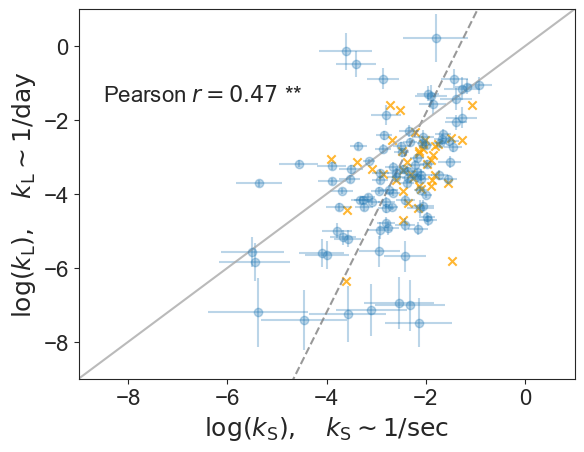

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

x_range = np.linspace(-9, 1, 100)

# from matlab b 3.5679 2.6922
intercept = 3.5679
slope = 2.6922

y_range = intercept + slope * x_range
unity = x_range

fig3, ax = plt.subplots()

# Scatter plot with error bars
plt.errorbar(c_fits_df['K_Short'], c_fits_df['K_L'], xerr=c_fits_df['K_S_sd'], yerr=c_fits_df['K_L_sd'],
             fmt='o', alpha = 0.3) #capsize = 5
plt.scatter(f_fits_df.K_Short, f_fits_df.K_L, color='orange', marker='x', alpha = 0.8)
ax.set_ylim(-9, 1)
ax.set_xlim(-9, 1)

# Plot Deming regression line
plt.plot(x_range, y_range, '--', color='grey', alpha = 0.8) #tls
plt.plot(x_range, unity, color='darkgrey', alpha = 0.8)

ax.text(
    0.05, 0.75, f"Pearson $r = 0.47$ **",
    transform=ax.transAxes, fontsize=16,
    bbox=dict(facecolor="white", alpha=0.5)
)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(18)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
ax.set_ylabel(r"$\log(k_{\text{L}}), \quad k_{\text{L}} \sim \text{1/day}$", fontsize=18)
ax.set_xlabel(r"$\log(k_{\text{S}}), \quad k_{\text{S}} \sim \text{1/sec}$", fontsize=18)

#fig3.savefig('../../figs/corr_ShortvsLong.pdf', bbox_inches="tight")

## Distributions

<Figure size 800x600 with 0 Axes>

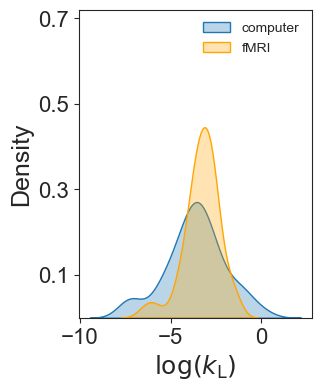

In [50]:
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
fig.set_size_inches(3,4)
sns.kdeplot(data=c_fits_df['K_L'], fill=True, alpha=0.3, label="computer")
sns.kdeplot(data=f_fits_df['K_L'], fill=True, alpha=0.3, label="fMRI", color="orange")

plt.xlabel(r"$\log(k_{\text{L}})$")
plt.ylabel("Density")
plt.legend(frameon=False)
ax.set_ylim(0, 0.72)
ax.set_yticks([0.1, 0.3, 0.5, 0.7])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(18)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

#fig.savefig('../../figs/dist_Long.pdf', bbox_inches="tight")

<Figure size 800x600 with 0 Axes>

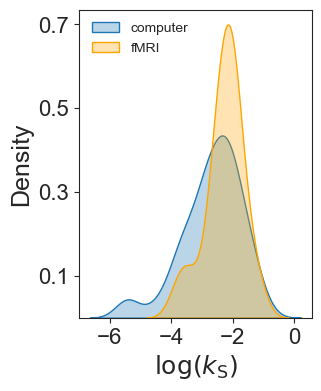

In [55]:
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
fig.set_size_inches(3,4)
sns.kdeplot(data=c_fits_df['K_Short'], fill=True, alpha=0.3, label="computer")
sns.kdeplot(data=f_fits_df['K_Short'], fill=True, alpha=0.3, label="fMRI", color="orange")

# Labels and legend
plt.xlabel(r"$\log(k_{\text{S}})$")
plt.ylabel("Density")
plt.legend(loc='upper left', frameon=False)
ax.set_yticks([0.1, 0.3, 0.5, 0.7])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(18)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

#fig.savefig('../../figs/dist_Short.pdf', bbox_inches="tight")

## Stability Figure

In [57]:
fits = f_fitsLL_df = pd.merge(f_fits_df, c_fits_df, on='subjid', how = 'inner')

In [59]:
fits.to_csv('../../data/joint_fits.csv', index=False)

In [61]:
fits_d = fits.drop(columns=['K_L_sd_x', 'K_L_sd_y', 'K_S_sd_x','K_S_sd_y','noise_L_x','noise_S_x','noise_L_y','noise_S_y'])
fits_d.rename(columns={'K_S_x': 'K_S-2', 'K_S_y': 'K_S-1','K_L_x': 'K_L-2', 'K_L_y': 'K_L-1'}, inplace=True)
fits_l = pd.wide_to_long(fits_d, ['K_S','K_L'], i = 'subjid', j = 'session', sep = '-')

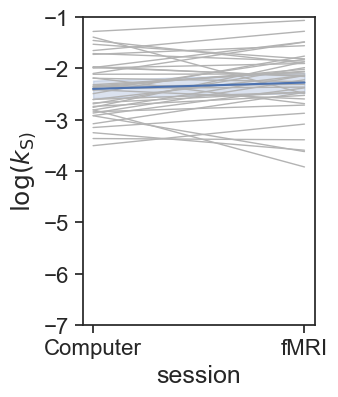

In [69]:
import seaborn as sns

fits_l["K_Short"] = np.log(np.exp(fits_l["K_S"])/86400)
fits_l["K_Long"] = fits_l["K_L"]
sns.set_theme(style="ticks")
font = {'size'   : 40}

plt.rc('font', **font)
fig, ax = plt.subplots()
fig.set_size_inches(3,4)
kss = sns.lineplot(
    data=fits_l, x="session", y="K_Short", units='subjid', 
    color=".7", linewidth=1, estimator=None,
    )
kss.set_ylim(-7, -1)
kss.set_xticks([1, 2])
ax.set_xticklabels(["Computer", "fMRI"])  

ax.set_ylabel(r"$\log(k_{\text{S})}$", fontsize=20)

ks = sns.lineplot(
    data=fits_l,
    x="session", y="K_Short",
)
#ks.yaxis.tick_left()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(18)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

#fig.savefig('../../figs/logk_Short.pdf', bbox_inches="tight")

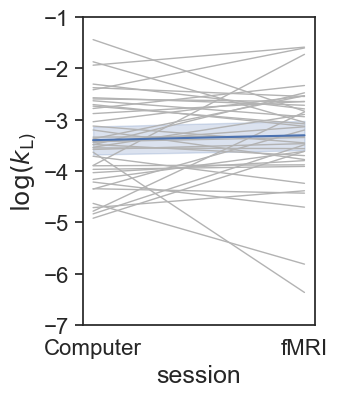

In [75]:

fits_l["K_Long"] = fits_l["K_L"]
sns.set_theme(style="white")
plt.rc('font', **font)
fig2, ax = plt.subplots()
fig2.set_size_inches(3,4)
kds = sns.lineplot(
    data=fits_l, x="session", y="K_Long", units='subjid', 
    color=".7", linewidth=1, estimator=None,
    )
kds.set_ylim(-7, -1)
kds.set_xticks([1, 2])
ax.set_xticklabels(["Computer", "fMRI"]) 
# LaTeX-style y-axis label
ax.set_ylabel(r"$\log(k_{\text{L})}$", fontsize=20)

kd = sns.lineplot(
    data=fits_l,
    x="session", y="K_Long", 
)
kd.yaxis.tick_left()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(18)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
#fig2.savefig('../../figs/logk_Long.pdf', bbox_inches="tight")